In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


### preprocess

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


### Steps

##### 0. Preprocess(missing values , outlier or removing unnecessary columns)  + EDA(understanging data by platting) + Feature Selection(select important columns)
##### 1. Extract input and output cols
##### 3. Train test split
##### 2. Scale the values(range)
##### 4. Train the model
##### 5. Evaluate the model/model selection
##### 6. Deploy the model

### EDA

In [8]:
import matplotlib.pyplot as plt


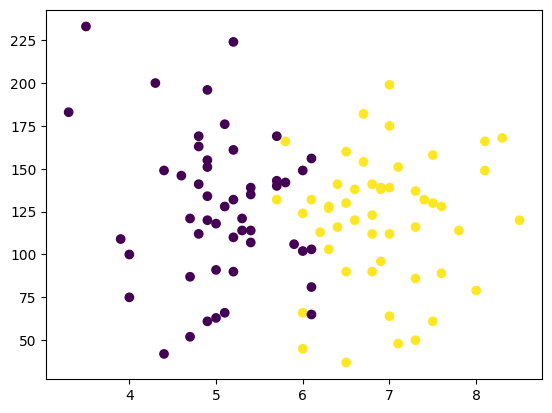

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

### Feature selection

In [10]:
# nothing to do in this dataset

### Extract input and output cols

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [14]:
print(X.shape,y.shape)

(100, 2) (100,)


### Train test split

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [16]:
X_train

,cgpa,iq
51,4.8,141.0
87,5.7,132.0
54,6.4,141.0
78,6.1,81.0
42,7.6,89.0
...,...,...
89,4.9,151.0
69,8.5,120.0
5,7.1,48.0
49,5.4,135.0


In [17]:
y_train

51    0
87    1
54    1
78    0
42    1
     ..
89    0
69    1
5     1
49    0
68    0
Name: placement, Length: 80, dtype: int64

In [18]:
X_test

,cgpa,iq
83,7.5,130.0
62,6.0,102.0
65,8.1,166.0
97,6.7,182.0
70,6.3,127.0
15,5.1,176.0
17,3.3,183.0
6,5.7,143.0
34,4.8,163.0
30,7.6,128.0


In [19]:
y_test

83    1
62    0
65    1
97    1
70    1
15    0
17    0
6     0
34    0
30    1
56    0
55    1
59    0
53    1
72    1
61    1
50    0
86    0
45    1
99    1
Name: placement, dtype: int64

##### Scale

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train the model

In [52]:
#naive_bayes

In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [54]:
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [55]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [56]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred2))
print("Bernaulli",accuracy_score(y_test,y_pred3))

Gaussian 0.9
Multinomial 0.7
Bernaulli 0.45


In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    GaussianNB(), X, y, cv=5
)
scores.mean()

np.float64(0.9099999999999999)

In [59]:
#svc

In [60]:
from sklearn.svm import SVC

In [61]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

C:\Users\Bhavika Jhanwar\AppData\Local\Temp\ipykernel_17368\3517609663.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  classifier.fit(X_train, y_train.ravel())


In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train_scaled, y_train)

print(grid.best_estimator_)

SVC(C=0.1, kernel='linear')


In [75]:
grid.best_score_

np.float64(0.9375)

In [63]:
#logistic

In [64]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy_score(y_test, y_pred)


0.9

In [65]:
#knn

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.7

In [67]:
#decision tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.9

In [69]:
#random forest

In [101]:
rf = RandomForestClassifier(
    n_estimators=10,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.95

### Evaluate the model

In [102]:
rf = RandomForestClassifier(
    n_estimators=10,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

print("Train:", accuracy_score(y_train, rf.predict(X_train)))
print("Test :", accuracy_score(y_test, rf.predict(X_test)))

Train: 0.9875
Test : 0.95


In [105]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=3)
print("CV Accuracy:", cv_scores.mean())

CV Accuracy: 0.9396910279263221


In [106]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


[[9 0]
 [2 9]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.82      0.90        11

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20



##### Random Forest achieved the highest accuracy of 95% on test data, outperforming Naive Bayes and SVM.
##### It effectively captured non-linear relationships between features and showed stable performance during cross-validation.
##### Hence, Random Forest was selected as the final model.

In [107]:
rf.feature_importances_

array([0.877036, 0.122964])

In [108]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Bhavika Jhanwar\ml_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<Axes: >

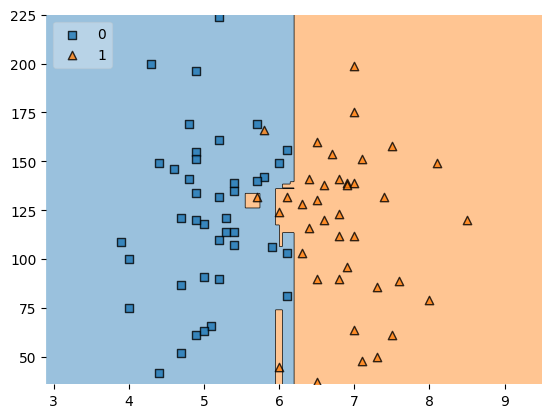

In [111]:
plot_decision_regions(X_train.values, y_train.values, clf=rf, legend=2)

In [114]:
import joblib

In [115]:
joblib.dump(rf, "placement_model.pkl")

['placement_model.pkl']

In [120]:
print(rf.predict([[5.9, 106]]))  # Should output array([0]) 
print(rf.predict([[6.8, 123.0]]))   # Should output array([1]) 
print(rf.predict([[5.3,121.0]]))   # Should output array([0])

[0]
[1]
[0]


C:\Users\Bhavika Jhanwar\ml_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bhavika Jhanwar\ml_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bhavika Jhanwar\ml_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
from sklearn.utils import resample

df_majority = df[df['placement'] == 0]
df_minority = df[df['placement'] == 1]

df_minority_upsampled = resample(df_minority,
                                replace=True,
                                n_samples=len(df_majority),
                                random_state=42)

data_balanced = pd.concat([df_majority, df_minority_upsampled])

X = data_balanced[['iq', 'cgpa']]
y = data_balanced['placement']


In [121]:
print(y_train.value_counts())
print(y_test.value_counts())


placement
0    41
1    39
Name: count, dtype: int64
placement
1    11
0     9
Name: count, dtype: int64
